In [1]:
import pandas as pd

In [2]:
loans = pd.read_csv('../loanstats.csv')

In [3]:
loans['term'] = loans['term'].map(lambda a: int(a.strip(' months')))
loans['application_type'] = loans['application_type'].map(lambda a: 1 if a=='Joint App' else 0)

def elength(a):
    if (a=='n/a'):
        return 0
    elif (a=='10+ years'):
        return 10
    elif (a=='1 year'):
        return 1
    elif (a=='< 1 year'):
        return 0.5
    else:
        return float(a.strip(' years'))
    
loans['emp_length'] = loans['emp_length'].map(lambda a: elength(a))

loans['revol_util'] = loans['revol_util'].map(lambda a: float(a.strip('%')))

homes = pd.get_dummies(loans['home_ownership'], prefix='home')
loans = loans.join(homes)
loans.drop('home_ownership', axis=1, inplace=True)

#states = pd.get_dummies(loans['addr_state'], prefix='st')
#loans = loans.join(states)
loans.drop('addr_state', axis=1, inplace=True)

loans.drop('grade', axis=1, inplace=True)
loans.drop('sub_grade', axis=1, inplace=True)
loans.drop('set', axis=1, inplace=True)
loans.drop('emp_title', axis=1, inplace=True)
loans.drop('timestamp', axis=1, inplace=True)
loans.drop('issue_d', axis=1, inplace=True)
loans.drop('last_credit_pull_d', axis=1, inplace=True)
loans.drop('title', axis=1, inplace=True)
loans.drop('purpose', axis=1, inplace=True)
loans.drop('next_pymnt_d', axis=1, inplace=True)
loans.drop('zip_code', axis=1, inplace=True)
loans.drop('last_fico_range_high', axis=1, inplace=True)
loans.drop('fico_range_high', axis=1, inplace=True)
loans.drop('last_fico_range_low', axis=1, inplace=True)
loans.drop('installment', axis=1, inplace=True)
loans.drop('id', axis=1, inplace=True)

loans = loans[loans['dti']>=0]

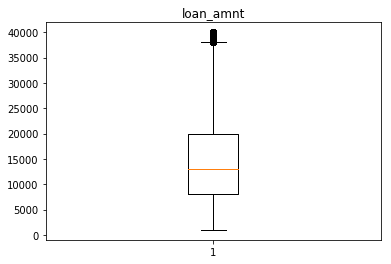

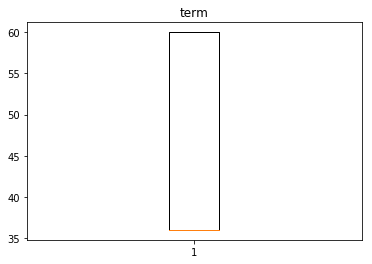

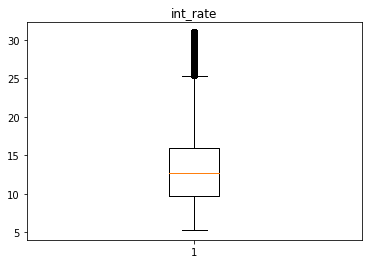

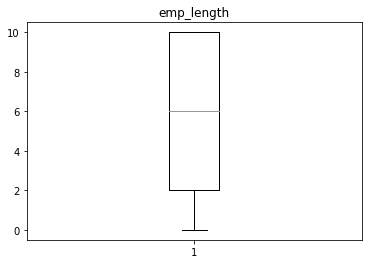

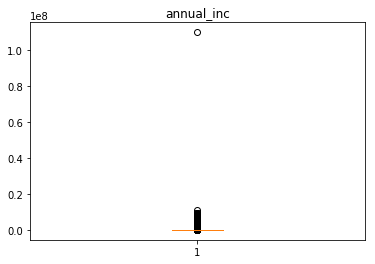

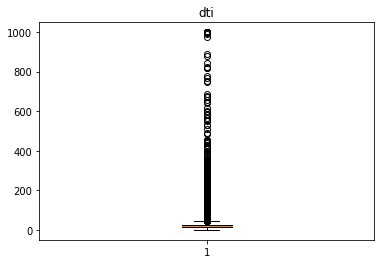

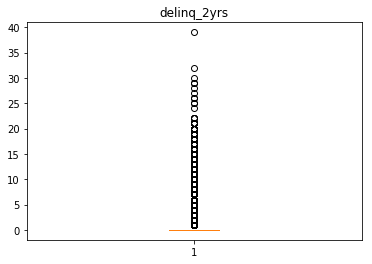

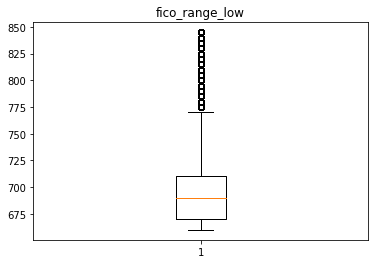

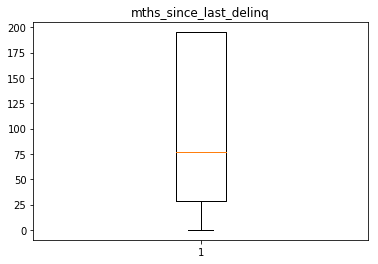

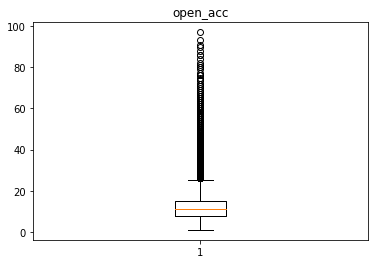

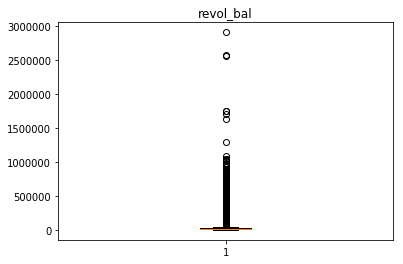

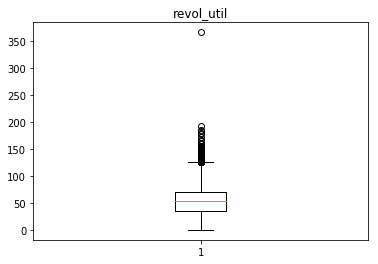

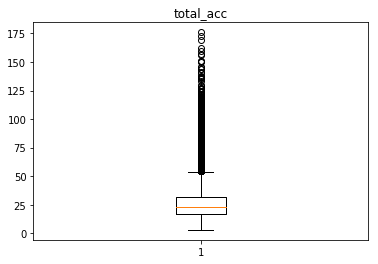

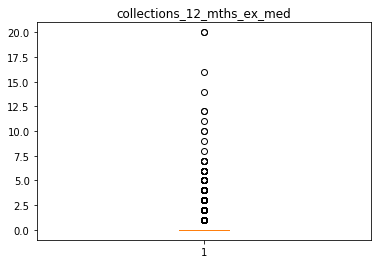

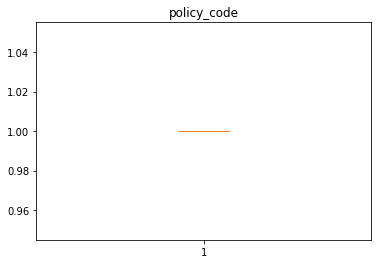

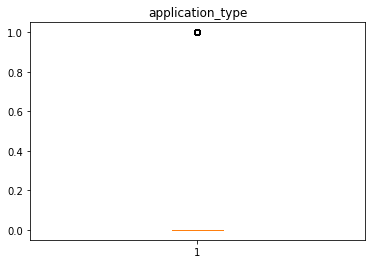

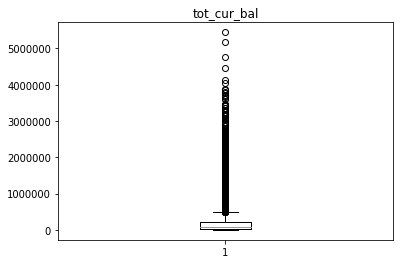

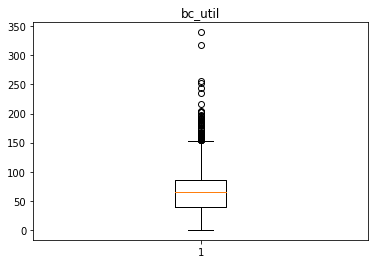

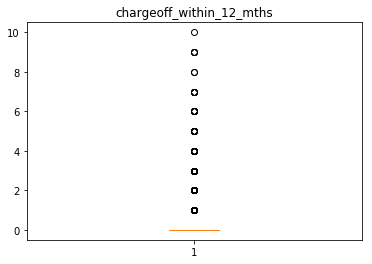

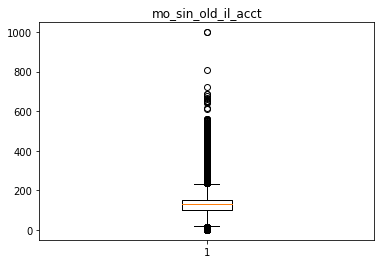

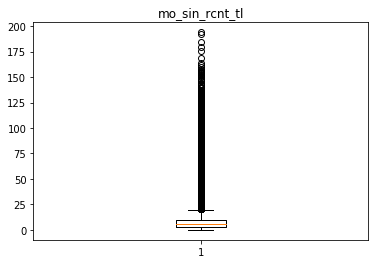

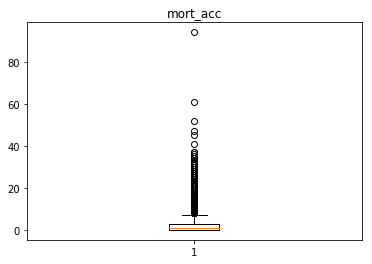

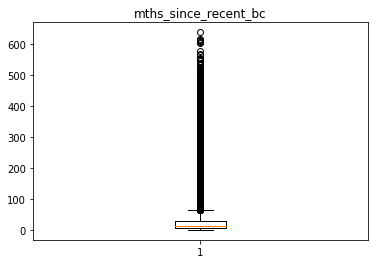

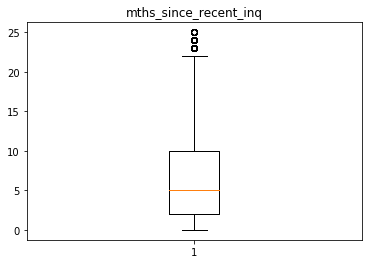

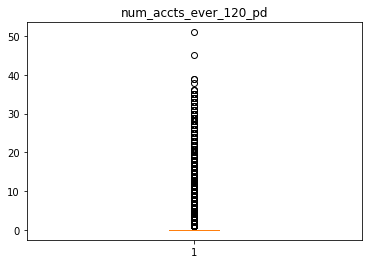

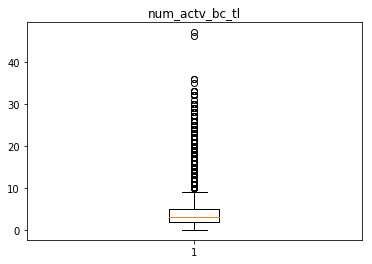

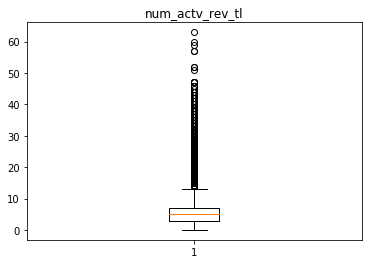

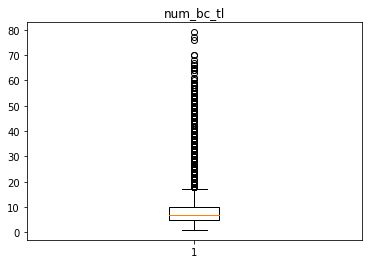

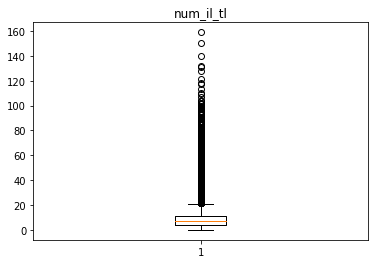

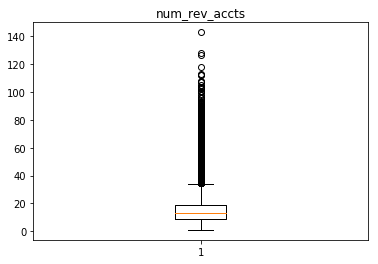

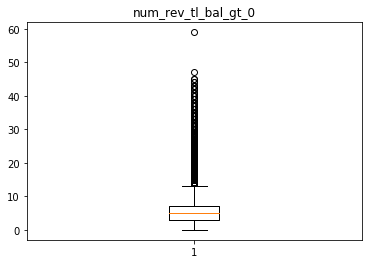

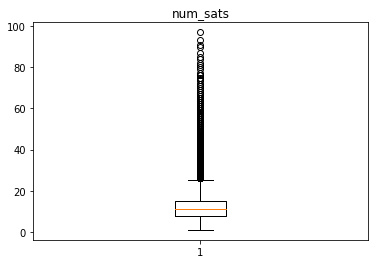

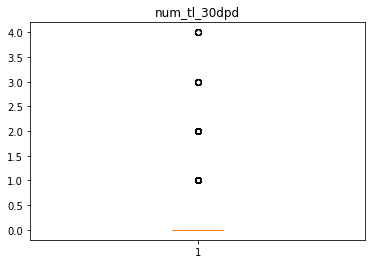

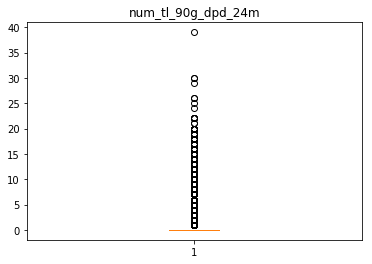

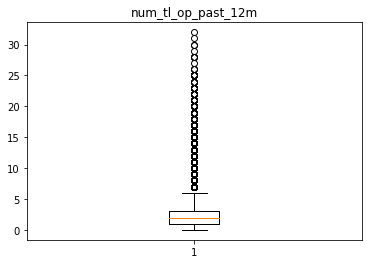

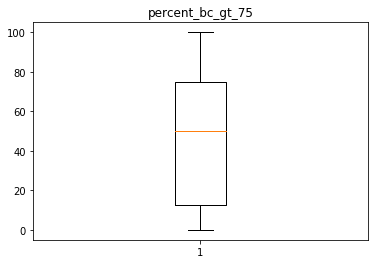

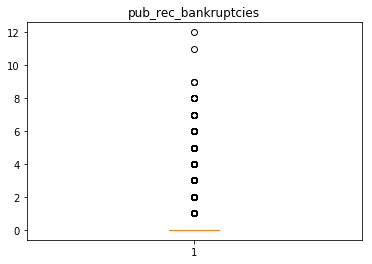

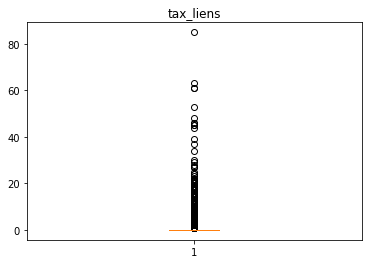

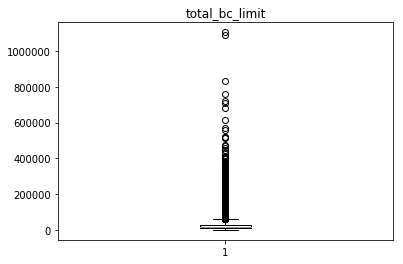

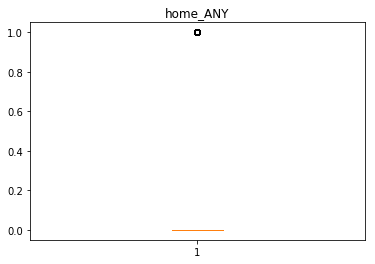

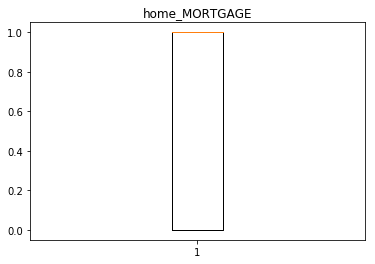

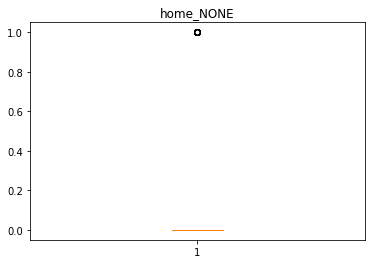

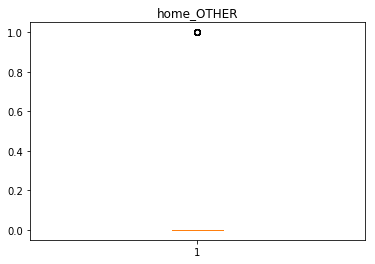

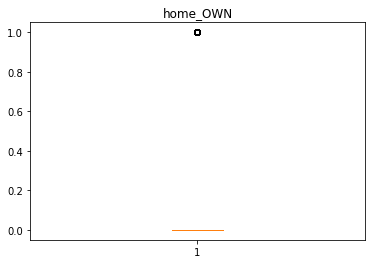

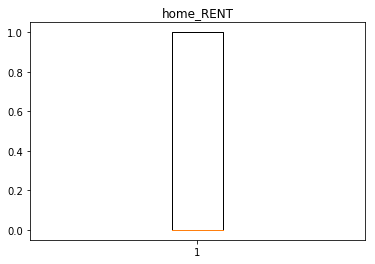

In [5]:
import matplotlib.pyplot as plt

columns = list(loans)
for c in columns:
    plt.figure()
    plt.boxplot(loans[c])
    plt.title(c)
    plt.show()



In [6]:
c = list(loans)
c

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'mths_since_last_delinq',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'tot_cur_bal',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'total_bc_limit',
 'home_ANY',
 'home_MORTGAGE',
 'home_NONE',
 'home_OTHER',
 'home_OWN',
 'home_RENT']

In [9]:
def inc(a):
    if a > 100000000:
        return loans['annual_inc'].mean()
    else:
        return a
loans['annual_inc'] = loans['annual_inc'].map(lambda a: inc(a))